In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iris data classification/Iris Flower - Iris.csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
# checking for null values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# checking for duplicate values
df.duplicated().sum()

0

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.rename(columns={'Species':'response'},inplace=True)
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,response
16,17,5.4,3.9,1.3,0.4,Iris-setosa
23,24,5.1,3.3,1.7,0.5,Iris-setosa
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
69,70,5.6,2.5,3.9,1.1,Iris-versicolor


In [ ]:
df.drop(columns=['Id'],  inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,response
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 2. **Exploartory Data Analysis**

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['response'] = encoder.fit_transform(df['response'])

In [ ]:
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,response
42,4.4,3.2,1.3,0.2,0
87,6.3,2.3,4.4,1.3,1
145,6.7,3.0,5.2,2.3,2
144,6.7,3.3,5.7,2.5,2
49,5.0,3.3,1.4,0.2,0


In [ ]:
df['response'].value_counts()

0    50
1    50
2    50
Name: response, dtype: int64

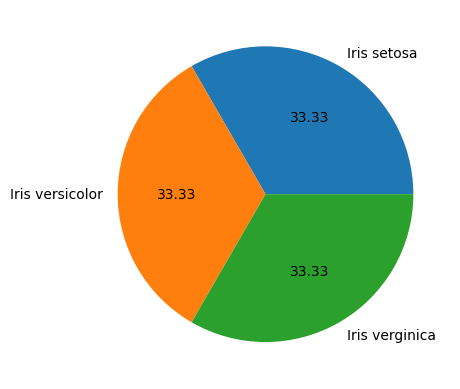

In [ ]:
plt.pie(df['response'].value_counts(), labels=['Iris setosa','Iris versicolor', 'Iris verginica'],autopct="%0.2f")
plt.show()

<Figure size 1000x1000 with 0 Axes>

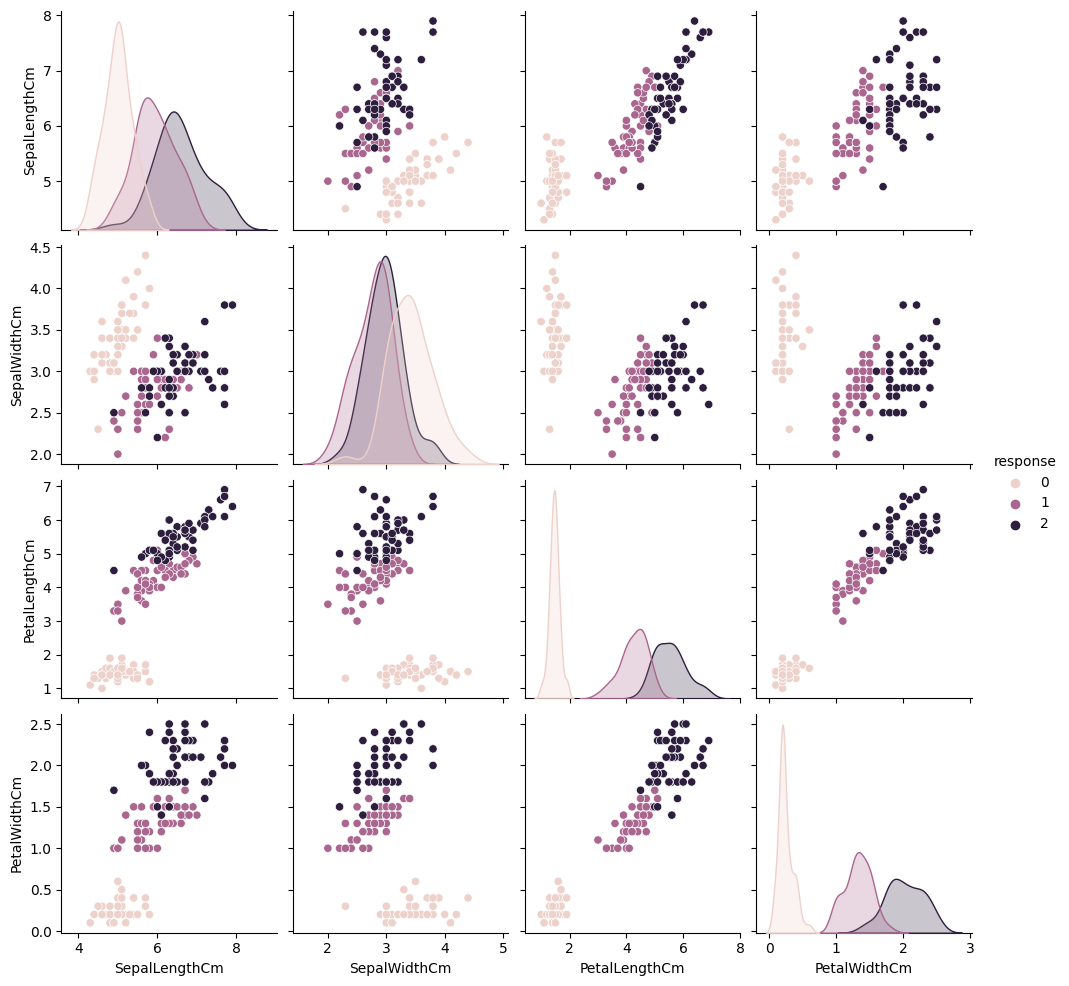

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(df, hue = 'response', vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

<Axes: >

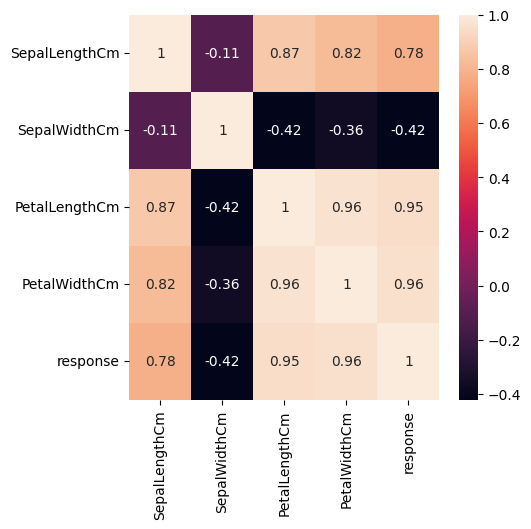

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True)

# **3.Building the model**

In [ ]:
X = df.drop(['response'],axis=1)
y = df['response']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model= svm.SVC(kernel='linear')

In [ ]:
model.fit(X_train,y_train)

SVC(kernel='linear')

# **4. Model Evaluation**

<Axes: >

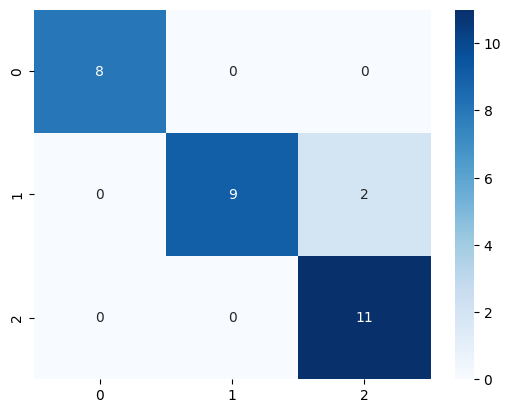

In [ ]:
y_predict = model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True,cmap='Blues')

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.82      0.90        11
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



# **5. Building a predictive System**

In [ ]:
input_data = (6.4,2.7,5.3,1.9)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Iris setosa')
elif (prediction[0] == 1):
  print('Iris versicolor')
else:
  print('Iris virginica')

[2]
Iris virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
import pickle

In [ ]:
filename ="trained_model.sav"
pickle.dump(model,open(filename, 'wb'))